# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)

## [Don't get kicked RAMP]: classify used cars into good or bad buys

_Chloé Baraille, Yassine Benazzou, Marion Karakouzian, Othmane Sebbouh, Sholom Schechtman_

## Introduction

The study of the market of "lemons" is at the basis of the theories of adverse selection in microeconomics. In 1970, George Akerlof wrote an article, "The Market for Lemons: Quality Uncertainty and the Market Mechanism", where he considered the market of used cars as an illustration of adverse selection. In this market, there are "lemons", which are bad buys, and "peaches", which aren't. As the consumers who come to the market of used cars don't have the certainty of buying a peach, they aren't willing to pay the "peach" price, which is high, but only an average between the high price and the low price. As a result, the holders of "peach" cars exit the market, which leaves the remaining buyers with a market with almost just lemons.

To protect the consumers from the consequences of buying bad quality cars, the US government published the "lemon law" or  the Magnuson–Moss Warranty Act that protects the population from deceptive warranty practices in 1975. The purpose of the Act was to make product warranties more easily understood and enforceable, and to provide the Federal Trade Commission with a means of better protecting consumers.

Instead of protecting consumers through better warrancies in order to satisfy them after the buy, we would like to present a tool that helps in the initial decision. Namely, we would want to detect the lemons on the market in order to increase consumer satisfaction. The goal is to develop prediction models able to predict if the car purchased at an Auction is a good or a bad buy (IsBadBuy is the variable to predict), i.e. if a car is a "lemon" or a "peach". These bad cars are called "lemon", they have several manufacturing defects which may affect the safety, value or use of the vehicle. 

Nowadays, lots of websites develop tricks to help people avoid to lemons. The solutions to this challenge must give the buyers some keys to buy the good cars. Thus, the goal of our predictions would be to increase the overall satisfaction of consumers.

The data we will manipulate is from Carvana. Carvana is an American start-up, founded in 2012. It consists on an online-only used car dealer that allows customers to shop, finance, and trade in cars through their website. 

A non-exhaustive list of the inputs we have:
* The date of the purchase
* Auction provider
* The year and age of the vehicle
* The vehicle manufacturer, model and submodel, color
* The vehicle transmission type
* The nationality of the vehicle
* The size category
* The odometer reading
* Different acquisition prices
* The acquisition type
* The warranty cost
* If the vehicle was originally purchased online
* The Zipcode and the state where the car was purchased

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.19.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   
* seaborn>=0.7.1
* imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory data analysis

### Loading the data

In [2]:
train_filename = 'data/train.csv'
data = pd.read_csv(train_filename, sep=',')
data['PurchDate'] = pd.to_datetime(data['PurchDate'])
print(data.shape)
data.head()

(60000, 35)


,Unnamed: 0,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [42]:
data.dtypes

Unnamed: 0                                    int64
RefId                                         int64
IsBadBuy                                      int64
PurchDate                            datetime64[ns]
Auction                                      object
VehYear                                       int64
VehicleAge                                    int64
Make                                         object
Model                                        object
Trim                                         object
SubModel                                     object
Color                                        object
Transmission                                 object
WheelTypeID                                 float64
WheelType                                    object
VehOdo                                        int64
Nationality                                  object
Size                                         object
TopThreeAmericanName                         object
MMRAcquisiti

The training data frame has 72000+ instances.

In [43]:
data.describe()

,Unnamed: 0,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,57678.000000,60000.000000,59986.000000,59986.000000,59986.000000,59986.000000,59720.000000,59720.000000,59720.000000,59720.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,30017.590900,0.118967,2005.385967,4.141883,1.502618,71201.736717,6165.574334,7404.359167,8553.882589,9900.460924,6164.090388,7416.471785,8828.483975,10190.235030,27724.575867,57746.915883,6741.161060,0.027067,1277.299700
std,17320.652413,17328.587447,0.323752,1.754275,1.734897,0.520454,14701.889993,2450.958834,2703.121144,3144.875057,3365.736245,2428.567341,2672.363176,3083.317946,3295.746045,27616.446576,26118.839757,1749.863625,0.162279,599.836625
min,0.000000,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,14999.750000,15009.750000,0.000000,2004.000000,3.000000,1.000000,61317.000000,4323.000000,5466.000000,6361.000000,7550.000000,4311.000000,5468.000000,6589.000000,7836.000000,17212.000000,32124.000000,5470.000000,0.000000,837.000000
50%,29999.500000,30020.500000,0.000000,2006.000000,4.000000,1.000000,73108.500000,6173.000000,7371.000000,8518.500000,9864.500000,6128.000000,7376.000000,8824.000000,10178.000000,19662.000000,73108.000000,6735.000000,0.000000,1155.000000
75%,44999.250000,45023.250000,0.000000,2007.000000,5.000000,2.000000,82294.250000,7798.000000,9035.750000,10705.000000,12117.750000,7763.250000,9022.000000,10973.000000,12342.000000,22916.000000,80011.000000,7900.000000,0.000000,1623.000000
max,59999.000000,60028.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [44]:
data.count()

Unnamed: 0                           60000
RefId                                60000
IsBadBuy                             60000
PurchDate                            60000
Auction                              60000
VehYear                              60000
VehicleAge                           60000
Make                                 60000
Model                                60000
Trim                                 58199
SubModel                             59998
Color                                59998
Transmission                         59997
WheelTypeID                          57678
WheelType                            57674
VehOdo                               60000
Nationality                          59997
Size                                 59997
TopThreeAmericanName                 59997
MMRAcquisitionAuctionAveragePrice    59986
MMRAcquisitionAuctionCleanPrice      59986
MMRAcquisitionRetailAveragePrice     59986
MMRAcquisitonRetailCleanPrice        59986
MMRCurrentA

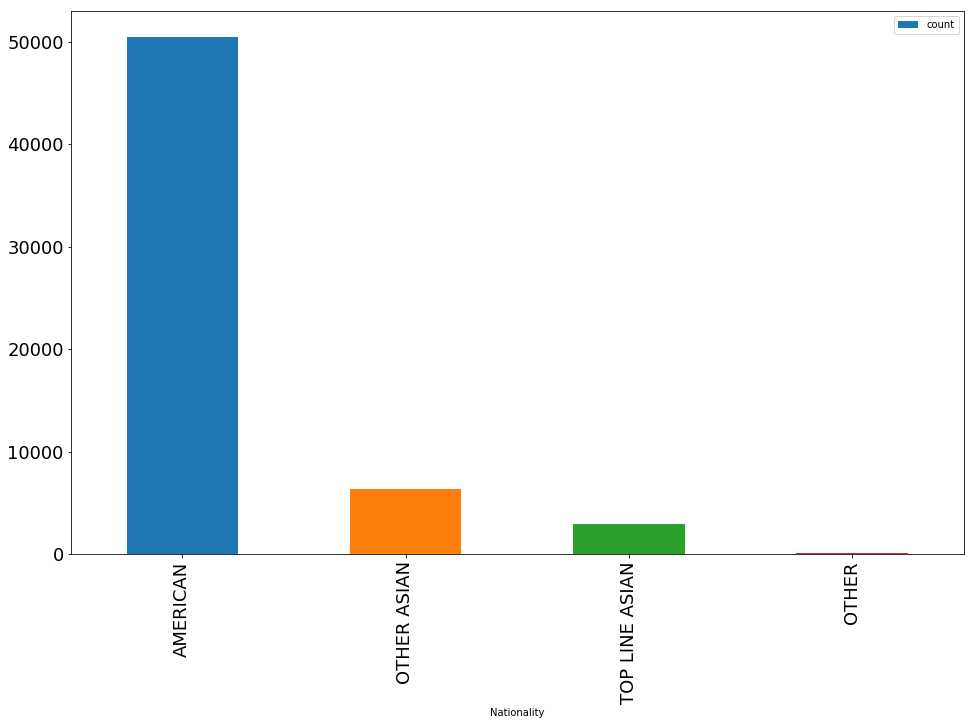

In [56]:
data.groupby('Nationality').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Nationality', y='count', figsize=(16, 10), fontsize=18)

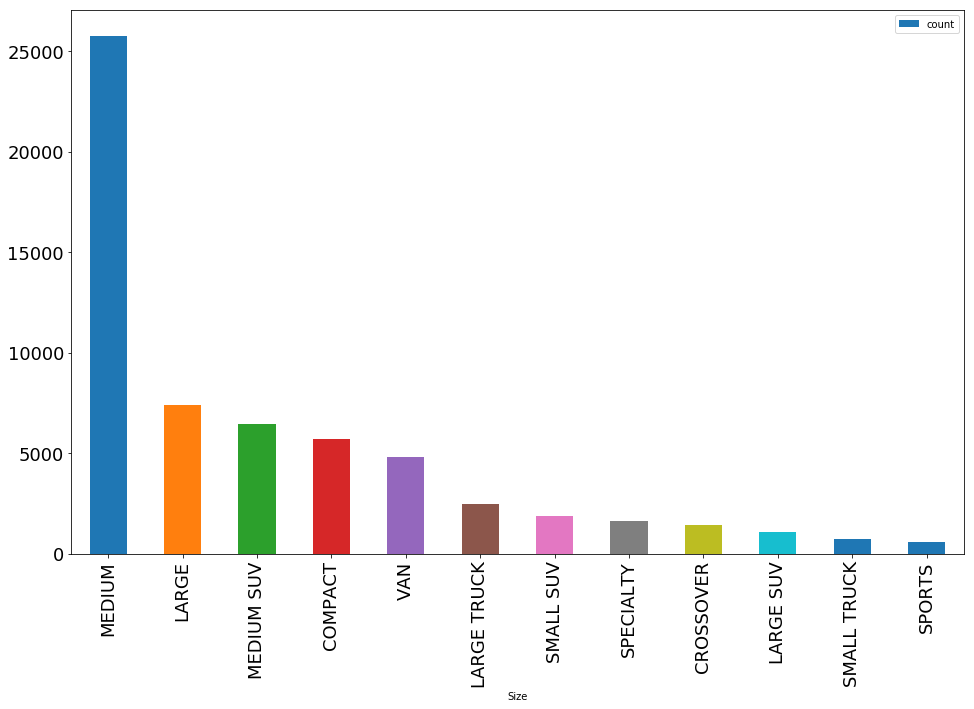

In [55]:
data.groupby('Size').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Size', y='count', figsize=(16, 10), fontsize=18);

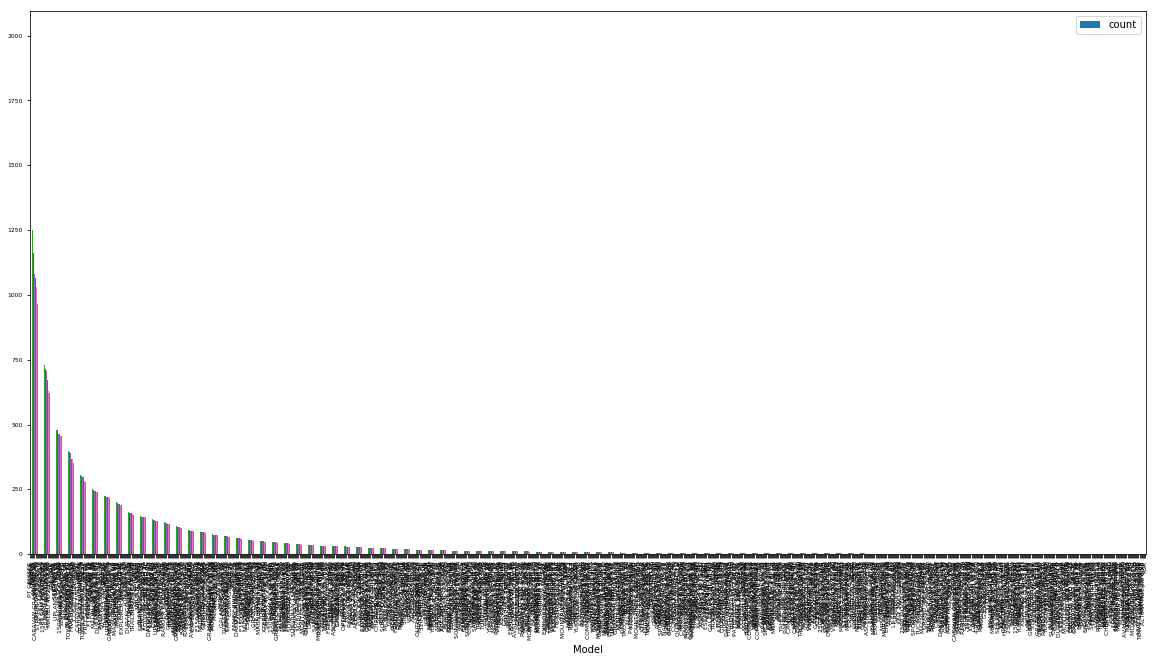

In [57]:
data.groupby('Model').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Model', y='count', figsize=(20, 10), fontsize=6);

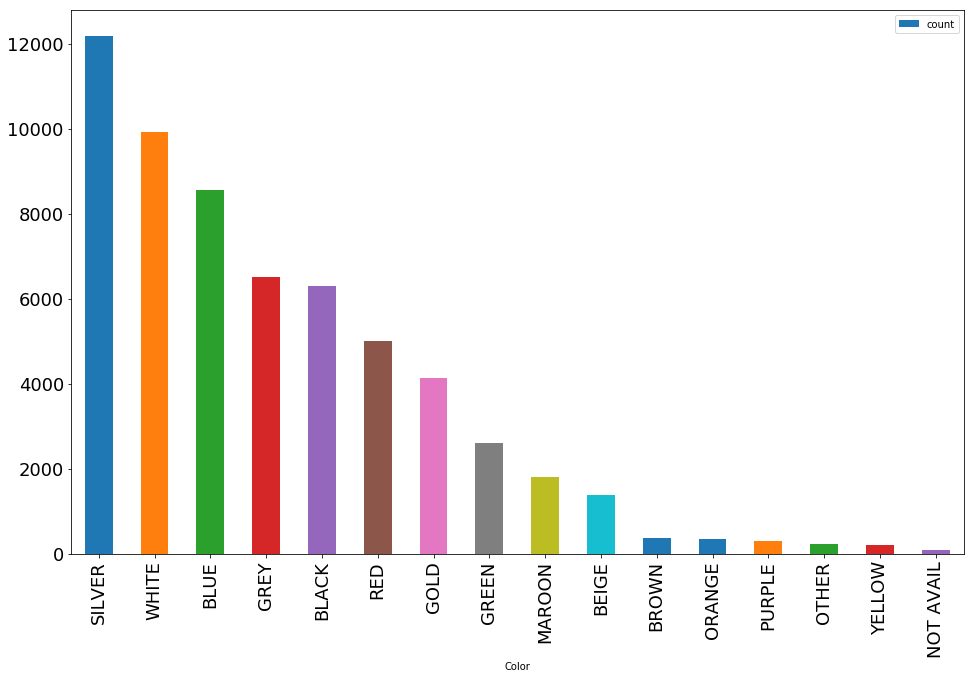

In [53]:
data.groupby('Color').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Color', y='count', figsize=(16, 10), fontsize=18);

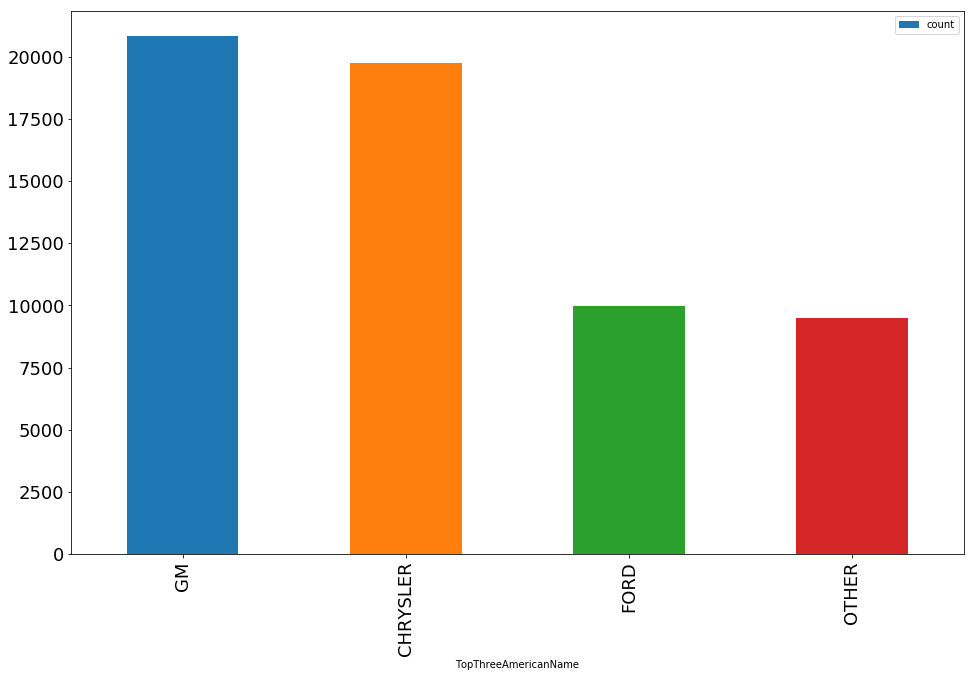

In [52]:
data.groupby('TopThreeAmericanName').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='TopThreeAmericanName', y='count', figsize=(16, 10), fontsize=18);

['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'IA' 'ID' 'IL' 'IN' 'KY' 'LA' 'MA' 'MD'
 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV']
37


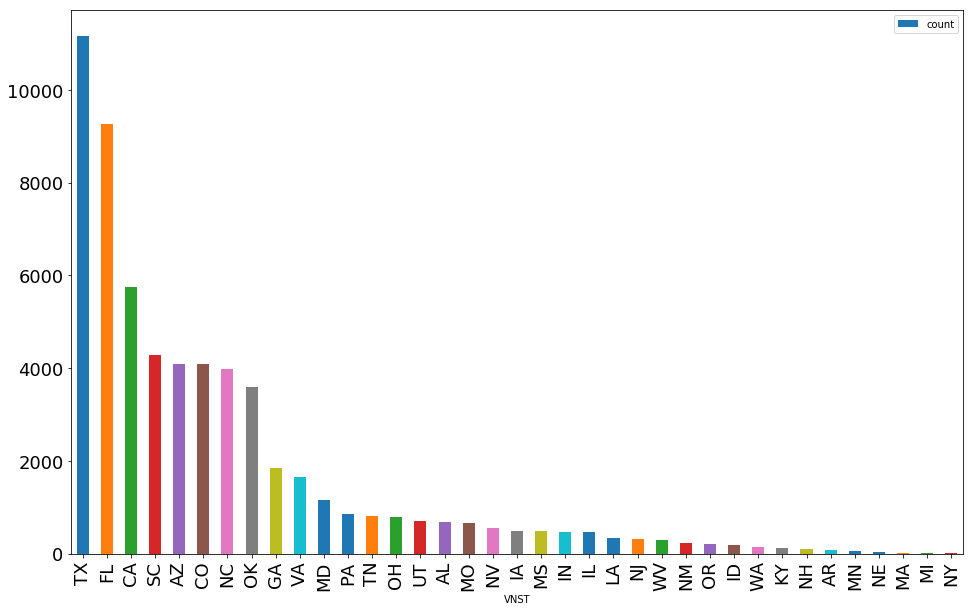

In [36]:
print(np.unique(data['VNST']))
print(len(np.unique(data['VNST'])))
data.groupby('VNST').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='VNST', y='count', figsize=(16, 10), fontsize=18);

# The available variables

In [37]:
# We count the missing data for each variable
print(data.isnull().sum())

Unnamed: 0                               0
RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1801
SubModel                                 2
Color                                    2
Transmission                             3
WheelTypeID                           2322
WheelType                             2326
VehOdo                                   0
Nationality                              3
Size                                     3
TopThreeAmericanName                     3
MMRAcquisitionAuctionAveragePrice       14
MMRAcquisitionAuctionCleanPrice         14
MMRAcquisitionRetailAveragePrice        14
MMRAcquisitonRetailCleanPrice           14
MMRCurrentA

We will not consider the variables **Unnamed**, **RefId** and **BYRNO** as they are not useful in the classification task. We will not use **AucGuart** and **PrimeUnit** either as most of the values of these variables are missing are missing.

The variable we are trying to predict is **IsbadBuy**. This binary variable indicates if the considered car is a "lemon", i.e. if it is a bad quality used car, which is more expensive than it should be regarding several characteristics of the car. In that case, it outputs 1. Otherwise, its value is 0.

We can predict if the car is a "lemon" not only using the **characteristics of the car**, but also some **external variables** related to the car. We list below the variables belonging to these two groups:

### Characteristics of the car:
- **Make:**	Vehicle Manufacturer 
- **Model:** Vehicle Model
- **Trim:**	Vehicle Trim Level
- **SubModel:**	Vehicle Submodel
- **Color:**	Vehicle Color
- **Transmission:**	Vehicles transmission type (Automatic, Manual)
- **WheelTypeID:**	The type id of the vehicle wheel
- **WheelType:** The vehicle wheel type description (Alloy, Covers)
- **VehOdo:**	The vehicles odometer reading
- **Nationality:**	The Manufacturer's country
- **Size:**	The size category of the vehicle (Compact, SUV, etc.)
- **TopThreeAmericanName:** Identifies if the manufacturer is one of the top three American manufacturers

### Other variables (price, auction details, ...):
- **PurchDate:** The Date the vehicle was Purchased at Auction
- **Auction:**	Auction provider at which the  vehicle was purchased
- **VehYear:**	The manufacturer's year of the vehicle
- **VehicleAge:** The Years elapsed since the manufacturer's year
- **MMR Prices:** 8 variables. 8 MMR prices (found in the Manheim inventory: https://publish.manheim.com/en/services/valuation) based on over 10 million sales transactions for the previous 13 months of the car. Examples of variables: MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice.
- **VNZIP:** Zipcode where the car was purchased
- **VNST:** State where the the car was purchased
- **VehBCost:** Acquisition cost paid for the vehicle at time of purchase
- **WarrantyCost:** Warranty price (term=36month  and millage=36K) 
- **IsOnlineSale:** Identifies if the vehicle was originally purchased online

Some of the variables that are very highly correlated can be dropped. For example: **VehYear** and **Vehicle age**.

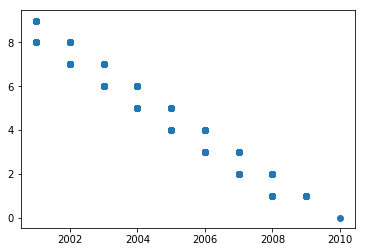

In [38]:
plt.scatter(data['VehYear'], data['VehicleAge'])

As expected, the MMR prices (retail and auction) are highly correlated. We also examine these prices' correlation with the actual acquisition cost, and the distribution of the prices.

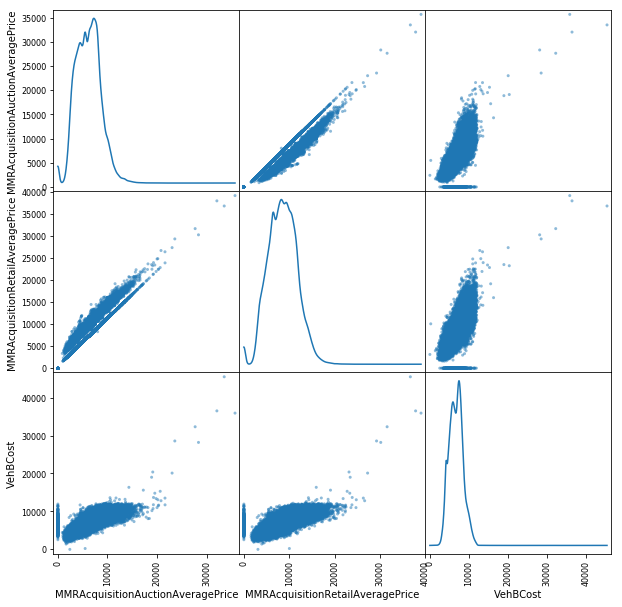

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.get(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
                         'VehBCost']), figsize=(10, 10), diagonal='kde');

# Models

We've chosen to ignore id variables (ByrNO and RefID), variables which have a lot of missing values (AUCGUART and PRIMEUNIT) and variables which are highly correlated with another one (VehYear e.g).

Also since our dataset is highly unbalanced (there is only 12% of lemons) any naive classifier which will always predict 0 would obtain an accuracy score of 88%. Hence for testing our models we've chosen to look at the area under the curve of the ROC.

In [2]:
import os
import pandas as pd
import rampwf as rw
from sklearn.model_selection import StratifiedShuffleSplit

problem_title = 'Lemons Classification'
_target_column_name = 'IsBadBuy'
_ignore_column_names = ["VehYear", "WheelTypeID", "AUCGUART", "PRIMEUNIT", "BYRNO", "VNST", "Unnamed: 0", "RefId"]
_prediction_label_names = [0, 1]
# A type (class) which will be used to create wrapper objects for y_pred
Predictions = rw.prediction_types.make_multiclass(
    label_names=_prediction_label_names)
# An object implementing the workflow
workflow = rw.workflows.FeatureExtractorClassifier()

score_types = [
    rw.score_types.ROCAUC(name='auc'),
    rw.score_types.Accuracy(name='acc'),
    rw.score_types.NegativeLogLikelihood(name='nll'),
]


def get_cv(X, y):
    cv = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=57)
    return cv.split(X, y)


def _read_data(path, f_name):
    data = pd.read_csv(os.path.join(path, 'data', f_name))
    y_array = data[_target_column_name].values
    X_df = data.drop([_target_column_name] + _ignore_column_names, axis=1)
    return X_df, y_array


def get_train_data(path='.'):
    f_name = 'train.csv'
    return _read_data(path, f_name)


def get_test_data(path='.'):
    f_name = 'test.csv'
    return _read_data(path, f_name)

### Feature extractor

We've used the same feature extractor for all of our models. We fill the Na values of MMR with their median, and we transform categorical variables to dummy ones using OneHotEncoder method

In [3]:
import pandas as pd

def add_missing_dummy_columns(d, columns):
    missing_cols = set(columns) - set(d.columns)
    for c in missing_cols:
        d[c] = 0


def fix_columns(d, columns):
    add_missing_dummy_columns(d, columns)

    # make sure we have all the columns we need
    assert (set(columns) - set(d.columns) == set())

    d = d[columns]
    return d


class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X_df, y=None):
        global column_dummies
        if y is not None:
            column_dummies = pd.concat(
            [X_df.get(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'PurchDate', 'WarrantyCost', 'RefId', 'VehYear', 'VehicleAge']),
             pd.get_dummies(X_df.Size, prefix = 'Size', drop_first=True),
             pd.get_dummies(X_df.Auction, prefix='Auction', drop_first=True),
             pd.get_dummies(X_df.Color, prefix='Color', drop_first=True),
             pd.get_dummies(X_df.Transmission, prefix='Transmission', drop_first=True),
             pd.get_dummies(
                 X_df.Nationality, prefix='Nationality', drop_first=True),
             pd.get_dummies(X_df.Model, prefix='Model', drop_first=True),
             pd.get_dummies(X_df.SubModel, prefix='SubModel', drop_first=True),
             pd.get_dummies(X_df.Make, prefix="Make", drop_first=True),
             pd.get_dummies(X_df.WheelType, prefix="WheelType", drop_first=True),
             pd.get_dummies(X_df.TopThreeAmericanName, prefix="TopThreeAmericanName", drop_first=True),
             pd.get_dummies(X_df.VNZIP1, prefix="VNZIP1", drop_first=True),
             ],
            axis=1).columns
        return self

    def transform(self, X_df):
        X_df["MMRAcquisitionAuctionAveragePrice"].fillna(X_df["MMRAcquisitionAuctionAveragePrice"].median())
        X_df["MMRAcquisitionAuctionCleanPrice"].fillna(X_df["MMRAcquisitionAuctionCleanPrice"].median())
        X_df["MMRAcquisitionRetailAveragePrice"].fillna(X_df["MMRAcquisitionRetailAveragePrice"].median())
        X_df["MMRAcquisitonRetailCleanPrice"].fillna(X_df["MMRAcquisitonRetailCleanPrice"].median())
        X_df.fillna(-1)
        X_df_new = pd.concat(
            [X_df.get(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'PurchDate', 'WarrantyCost', 'RefId', 'VehYear', 'VehicleAge']),
             pd.get_dummies(X_df.Size, prefix = 'Size', drop_first=True),
             pd.get_dummies(X_df.Auction, prefix='Auction', drop_first=True),
             pd.get_dummies(X_df.Color, prefix='Color', drop_first=True),
             pd.get_dummies(X_df.Transmission, prefix='Transmission', drop_first=True),
             pd.get_dummies(
                 X_df.Nationality, prefix='Nationality', drop_first=True),
             pd.get_dummies(X_df.Model, prefix='Model', drop_first=True),
             pd.get_dummies(X_df.SubModel, prefix='SubModel', drop_first=True),
             pd.get_dummies(X_df.Make, prefix="Make", drop_first=True),
             pd.get_dummies(X_df.WheelType, prefix="WheelType", drop_first=True),
             pd.get_dummies(X_df.TopThreeAmericanName, prefix="TopThreeAmericanName", drop_first=True),
             pd.get_dummies(X_df.VNZIP1, prefix="VNZIP1", drop_first=True),
             ],
            axis=1)
        X_df_new = X_df_new.fillna(-1)
        X_df_new = fix_columns(X_df_new, column_dummies).as_matrix()
        return X_df_new

## Logistic regression

The first model we tested is the logistic regression. Since our dataset is highly unbalanced we are doing some oversampling using the imblearn package

In [24]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

In [25]:
train_X, train_y = get_train_data()

In [26]:
fe = FeatureExtractor()
fe.fit(train_X, train_y)
X = fe.transform(train_X)

First test:

In [27]:
from sklearn.linear_model import LogisticRegression

clf = make_pipeline_imb(RandomOverSampler(), LogisticRegression(C=1, penalty="l1"))

clf.fit(X, train_y)
pred_y = clf.predict(X)
print(accuracy_score(train_y, pred_y), roc_auc_score(train_y, pred_y))

0.6650333333333334 0.6681834828493788


In [28]:
test_X, test_y = get_test_data()
test_X = fe.transform(test_X)
pred_y = clf.predict(test_X)
print(accuracy_score(test_y, pred_y), roc_auc_score(test_y, pred_y))

0.6748055149041053 0.6120396826675376


To find the right parameters for our model we perform a gridsearch over the parameters. To avoid recomputing the optimal parameters, we commented the code.

In [29]:
#from sklearn.grid_search import GridSearchCV

#parameters = {'logisticregression__C' : np.logspace(-3, 3, 30), "logisticregression__penalty" :  ["l1", "l2"]}
#clf2 = GridSearchCV(clf, parameters, scoring="roc_auc")
#clf2.fit(X, train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('randomoversampler', RandomOverSampler(random_state=None, ratio='auto')), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 1.61026e-03, 2.59294e-03, 4.17532e-03, 6.72336e-03,
       1.08264e-02, 1.74333e-02, 2.80722e-02, 4.52035e-02, 7.27895e-02,
       1.17210e-01, 1.88739e-01, 3.03920e-01, 4.89390e-01, 7.88046e-01,
       1.26896e+00, 2.04336e+00, 3.29034e+00, 5..., 2.39503e+02, 3.85662e+02, 6.21017e+02, 1.00000e+03]), 'logisticregression__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [30]:
#clf2.best_params_

{'logisticregression__C': 0.010826367338740546,
 'logisticregression__penalty': 'l2'}

In [31]:
%%writefile submissions/starting_kit/classifier.py 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = make_pipeline_imb(
            Imputer(strategy='median'), 
            RandomOverSampler(), 
            LogisticRegression(C=0.010826367338740546, penalty="l2"))

    def fit(self, X, y):
        self.clf.fit(X, y)
        

    def predict_proba(self, X):
        return self.clf.predict_proba(X)


Overwriting submissions/starting_kit/classifier.py


In [32]:
!ramp_test_submission 

Testing Lemons Classification
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
	score   auc   acc   nll
	train  0.69  0.62  0.64
	valid  0.67  0.60  0.64
	test   0.66  0.54  0.68
CV fold 1
	score   auc   acc   nll
	train  0.69  0.62  0.63
	valid  0.66  0.61  0.64
	test   0.67  0.54  0.69
CV fold 2
	score   auc   acc   nll
	train  0.69  0.62  0.63
	valid  0.66  0.61  0.64
	test   0.66  0.54  0.69
CV fold 3
	score   auc   acc   nll
	train  0.69  0.62  0.63
	valid  0.67  0.61  0.64
	test   0.67  0.52  0.69
CV fold 4
	score   auc   acc   nll
	train  0.69  0.62  0.64
	valid  0.67  0.60  0.64
	test   0.66  0.54  0.69
CV fold 5
	score   auc   acc   nll
	train  0.70  0.62  0.63
	valid  0.65  0.60  0.64
	test   0.66  0.53  0.70
CV fold 6
	score   auc   acc   nll
	train  0.69  0.62  0.63
	valid  0.67  0.61  0.64
	test   0.66  0.55  0.69
CV fold 7
	score   auc   acc   nll
	train  0.69  0.62  0.64
	valid  0.67  0.61  0.64
	test   0.66  0

## Random forest

The second model we tested is random forest, we use the same feature extractor as in logistic regression, oversample our dataset again and perform a grid search over the number of trees and the splitting criteria.

In [15]:
train_X, train_y = get_train_data()

In [16]:
fe = FeatureExtractor()
fe.fit(train_X, train_y)
X = fe.transform(train_X)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, auc, f1_score
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

clf = make_pipeline_imb(RandomUnderSampler(), RandomForestClassifier(100))

clf.fit(X, train_y)
pred_y = clf.predict(X)
print("Accuracy {}, f1 {}, roc_auc {}".format(accuracy_score(train_y, pred_y), f1_score(train_y, pred_y), roc_auc_score(train_y, pred_y)))

Accuracy 0.6847333333333333, f1 0.42202395502322176, roc_auc 0.8070246482753367


To find the right parameters for our model we perform a gridsearch over the parameters. To avoid recomputing the optimal parameters, we commented the code.

In [20]:
#from sklearn.grid_search import GridSearchCV

#parameters = {'randomforestclassifier__n_estimators' : np.linspace(1, 300, 20, dtype=int), "randomforestclassifier__criterion" :  ["gini", "entropy"]}
#clf2 = GridSearchCV(clf, parameters, scoring="roc_auc")
#clf2.fit(X, train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('randomundersampler', RandomUnderSampler(random_state=None, ratio='auto', replacement=False,
          return_indices=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestclassifier__n_estimators': array([  1,  16,  32,  48,  63,  79,  95, 111, 126, 142, 158, 174, 189,
       205, 221, 237, 252, 268, 284, 300]), 'randomforestclassifier__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [21]:
#clf2.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__n_estimators': 126}

In [ ]:
%%writefile submissions/random_forest/classifier.py 


from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler

class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = make_pipeline_imb(
            Imputer(strategy='median'),
            RandomOverSampler(),
            RandomForestClassifier(n_estimators=126, verbose=True, min_impurity_decrease=10e-5, criterion="entropy")
            )

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)


In [23]:
!ramp_test_submission --submission random_forest

Testing Lemons Classification
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/random_forest ...
CV fold 0
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    0.6s finished
	score   auc   acc   nll
	train  0.71  0.64  0.64
	valid  0.67  0.62  0.65
	test   0.66  0.55  0.68
CV fold 1
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:  4.4min finished
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    0.3s finished
	score   auc   acc   nll
	train  0.72  0.63  0.64
	valid  0.66  0.62  0.65
	test   0.66  0.54  0.68
CV fold 2
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    0.5s finished
	score   